In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Read the data set, clean the data and prepare a final dataset to be used for analysis

### Importing the dataset

In [2]:
df = pd.read_csv('Basketball.csv',index_col='Team')
pd.set_option('display.max_columns',None)
df.head()

,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
Team,,,,,,,,,,,,
Team 1,86,4385,2762,1647,552,563,5947,3140,33,23,1929,1
Team 2,86,4262,2762,1581,573,608,5900,3114,25,25,1929,1
Team 3,80,3442,2614,1241,598,775,4534,3309,10,8,1929,1
Team 4,82,3386,2664,1187,616,861,4398,3469,6,6,1931to32,1
Team 5,86,3368,2762,1209,633,920,4631,3700,8,7,1929,1


In [3]:
df.columns

Index(['Tournament', 'Score', 'PlayedGames', 'WonGames', 'DrawnGames',
       'LostGames', 'BasketScored', 'BasketGiven', 'TournamentChampion',
       'Runner-up', 'TeamLaunch', 'HighestPositionHeld'],
      dtype='object')

In [4]:
df.dtypes

Tournament              int64
Score                  object
PlayedGames            object
WonGames               object
DrawnGames             object
LostGames              object
BasketScored           object
BasketGiven            object
TournamentChampion     object
Runner-up              object
TeamLaunch             object
HighestPositionHeld     int64
dtype: object

In [5]:
df.isnull().sum()

Tournament             0
Score                  0
PlayedGames            0
WonGames               0
DrawnGames             0
LostGames              0
BasketScored           0
BasketGiven            0
TournamentChampion     0
Runner-up              0
TeamLaunch             0
HighestPositionHeld    0
dtype: int64

In [7]:
def convert(a):
    if a == '-':
        return 0
    else:
        return int(a)

In [11]:
df[['Tournament', 'Score', 'PlayedGames', 'WonGames', 'DrawnGames','LostGames', 'BasketScored', 'BasketGiven',
    'TournamentChampion','Runner-up']]= df[['Tournament', 'Score', 'PlayedGames', 'WonGames', 'DrawnGames','LostGames', 'BasketScored', 'BasketGiven',
    'TournamentChampion','Runner-up']].applymap(convert)

In [12]:
df

,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
Team,,,,,,,,,,,,
Team 1,86,4385,2762,1647,552,563,5947,3140,33,23,1929,1
Team 2,86,4262,2762,1581,573,608,5900,3114,25,25,1929,1
Team 3,80,3442,2614,1241,598,775,4534,3309,10,8,1929,1
Team 4,82,3386,2664,1187,616,861,4398,3469,6,6,1931to32,1
Team 5,86,3368,2762,1209,633,920,4631,3700,8,7,1929,1
...,...,...,...,...,...,...,...,...,...,...,...,...
Team 57,1,34,38,8,10,20,38,66,0,0,2009-10,20
Team 58,1,22,30,7,8,15,37,57,0,0,1956-57,16
Team 59,1,19,30,7,5,18,51,85,0,0,1951~52,16


In [13]:
df.dtypes

Tournament              int64
Score                   int64
PlayedGames             int64
WonGames                int64
DrawnGames              int64
LostGames               int64
BasketScored            int64
BasketGiven             int64
TournamentChampion      int64
Runner-up               int64
TeamLaunch             object
HighestPositionHeld     int64
dtype: object

In [17]:
def convert_team_launch(year):
    if 'to' in year:
        start, end = year.split('to')
        return f"{start.strip()}-{end.strip()}"
    elif '-' in year:
        start, end = year.split('-')
        return f"{start.strip()}-{end.strip()}"
    elif '_' in year:
        start, end = year.split('_')
        return f"{start.strip()}-{end.strip()}"
    elif '~' in year:
        start, end = year.split('~')
        return f"{start.strip()}-{end.strip()}"
    else:
        return year.strip()

df['TeamLaunch'] = df['TeamLaunch'].apply(convert_team_launch)

In [18]:
df['TeamLaunch']

Team
Team 1        1929
Team 2        1929
Team 3        1929
Team 4     1931-32
Team 5        1929
            ...   
Team 57    2009-10
Team 58    1956-57
Team 59    1951-52
Team 60    1955-56
Team 61    2017-18
Name: TeamLaunch, Length: 61, dtype: object

### 2. Perform detailed statistical analysis and EDA using univariate, bi-variate and  multivariate EDA techniques to get data driven insights on recommending which teams they can approach which will be a deal win for them.. Also as a data and statistics expert you have to develop a detailed performance report using this data.

#### Univariate Analysis

C:\Users\Girish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

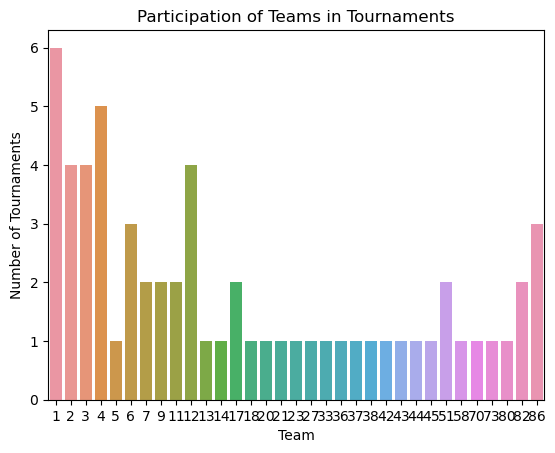

<Figure size 2000x800 with 0 Axes>

In [22]:
# Tournament Count

sns.countplot(df['Tournament'])
plt.xlabel('Team')
plt.ylabel('Number of Tournaments')
plt.title('Participation of Teams in Tournaments')
plt.figure(figsize=(20,8))
plt.show